# Boom Bikes Rental Demand Analysis


## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Importing necessary Packages for Visualization and model building

In [208]:
# Importing necessary Packages

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

# Library for Saving Model
import pickle

import joblib

# Filter warnings
warnings.filterwarnings('ignore') 

### Reading input Data File

In [209]:
# Reading input file
# File Path: G:\Linear Regression Assignment\day.csv
BoomBike_df = pd.read_csv(r"D:\Data Science\Boom Bike Sharing\Boom_Bike_Sharing_Linear_Regresion_Model_Debopriya\day.csv")

# Viewing top 5 rows after importing the DataFrame
BoomBike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the Shape, Summary and Statistical information on Dataset

In [210]:
# Checking the shape of the imported DataFrame
BoomBike_df.shape

(730, 16)

- Imported DataFrame is having `730` rows and `16` columns

In [211]:
# Checking the DataFrame.info, which tells us number of null values, datatypes etc. for each columns
BoomBike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [212]:
# Describing the DataFrame to check statistical summary like Min, max, mean, quantiles etc.
BoomBike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Null Value Analysis

In [213]:
# Checking the number of null values in each columns
BoomBike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- We can see that, there is no Null/ missing value in the input dataset

### Drop unnecessary variables

- **instant** - It is an index variale, so it does not make any siginficance for model, hence, we will drop it
- **dteday** - This dataset already having seperate columns for year ,month and weekday, So we can drop the date column
- **casual + registered = cnt** - As cnt column holds the same information, and also these values will not be available at the time of making prediction as it's a kind of target variable.
so we will consider to drop **casual** and **registered** and treate **cnt** as target variable.

In [214]:
# Dropping unnecessary variables
# instant - It is an index variale, so it doest make any siginficance for model, hence, we will drop it
# dteday - This dataset already having seperate columns for year ,month and weekday, So we can drop the date column
# casual + registered = cnt. Also these values will not be available at the time of making prediction as it's a kind of target variable.
# so we will consider to drop casual and registered and treate "cnt" as target variable.

BoomBike_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

# Viewing the Top 5 rows from dataframe after dropping unnecessaey columns.
BoomBike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [215]:
# Checking the Data types of each columns
BoomBike_df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Renaming columns for better clarity

In [216]:
# Renaming mnth, yr, hum, temp, atemp columns for better understanding
BoomBike_df.rename(columns={'mnth':'month', 'yr':'year', 'hum':'humidity', 'temp':'temperature', 'atemp':'feeling temperature'}, inplace = True)

# Reviewing the DataFrame top 5 rows after renaming columns
BoomBike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Variable Conversion: Numerical continuous to Categorical

In [217]:
# Custom Conversion Funtion for converting Numerical variables to Categorical variable
def Numeric_to_Category(col, dict_name):
    BoomBike_df[col] = BoomBike_df[col].map(dict_name)


In [218]:
# Calling custom function to convert numerical column 'season' into categorical column 
Numeric_to_Category('season', {1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Calling custom function to convert numerical column 'month' into categorical column
Numeric_to_Category('month',{1:'Jan',2:'Feb', 3:'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

# Calling custom function to convert numerical column 'weekday' into categorical column
Numeric_to_Category('weekday',{0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

# Calling custom function to convert numerical column 'weathersit' into categorical column
Numeric_to_Category('weathersit', {1: 'Clear', 2: 'Mist & Cloudy', 3: 'Light Snow', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist'})

In [219]:
# Reviewing DataFrame afer converting numerical columns to categorical columns
BoomBike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [220]:
# Checking datatype after conversion
BoomBike_df.dtypes

season                  object
year                     int64
month                   object
holiday                  int64
weekday                 object
workingday               int64
weathersit              object
temperature            float64
feeling temperature    float64
humidity               float64
windspeed              float64
cnt                      int64
dtype: object

## Data Visualization

- Perforn `EDA` to understand relation of target variable with other predictor variables
- Check the `correlation` between the variables

### Performing Exploratory Data Analysis (EDA)

#### Bivariate Analysis - Numerical vs. Numerical Variable

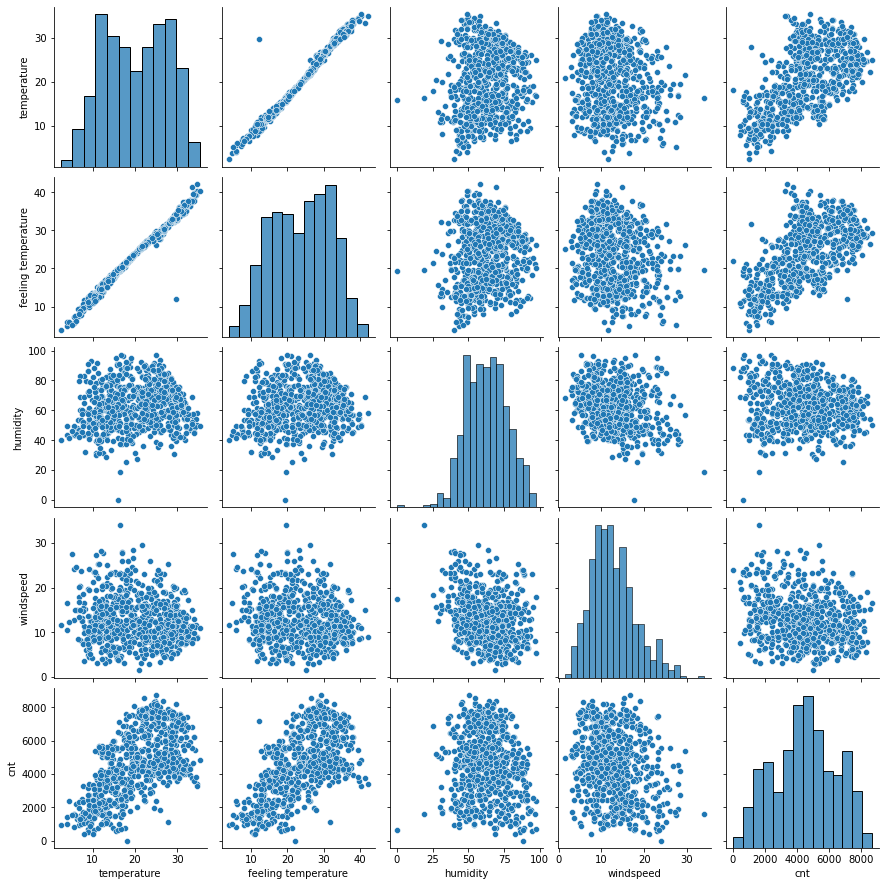

In [221]:
# Bivariate Analysis - Numerical - Numerical Variable

# Using pair plot visualizing the patterns between numerical variables
sns.pairplot(BoomBike_df, vars = ['temperature', 'feeling temperature', 'humidity', 'windspeed', 'cnt'])

# Displaying the plot using matplotlib.pyplot show() method
plt.show()

#### Inferense:

- From the above pair plot we can see that, **count of total bike rentals (i.e., dependent variable: `cnt`)** is having a **positive linear relationship with predictor variable `temperature` (in Celsius)**.

- It is also seen that, **count of total bike rentals (i.e., dependent variable: `cnt`)** is having a **positive linear relationship with predictor variable `feeling temperature` (in Celsius)**.

- On the other hand, we can notice that **predictor variables `humidity` and `windspeed` are not showing any linear correlation** with count of total bike rentals (i.e., dependent variable: `cnt`).

#### Bivariate Analysis - Categorical vs. Numerical Variable

In [222]:
# Bivariate Analysis - Categorical - Numerical Variable

# Custom Function for Category vs. Numerical Bivariate Analysis

 # Function Input Parameters: DataFrame, x-variable, y-variable, subplot coordinates
 # Function returns none

def bivariate_category_numeric(df, x_var, y_var, i, j, k):
    
    # Setting subplot coordinates
    plt.subplot(i,j,k)
    
    # Perform boxplot on categorical and numerical columns
    sns.boxplot(data = df, x = x_var, y = y_var)
    
    # Setting Y-label and display size and color
    plt.ylabel('Count', color = 'blue', labelpad = 15, fontsize = 25)
    
    # Setting x-label and display size and color
    plt.xlabel(x_var, color = 'blue', labelpad = 15, fontsize = 25)
    
    # Setting x-ticks font size
    plt.xticks(fontsize = 20)
    
    # Setting y-ticks font size
    plt.yticks(fontsize = 20)

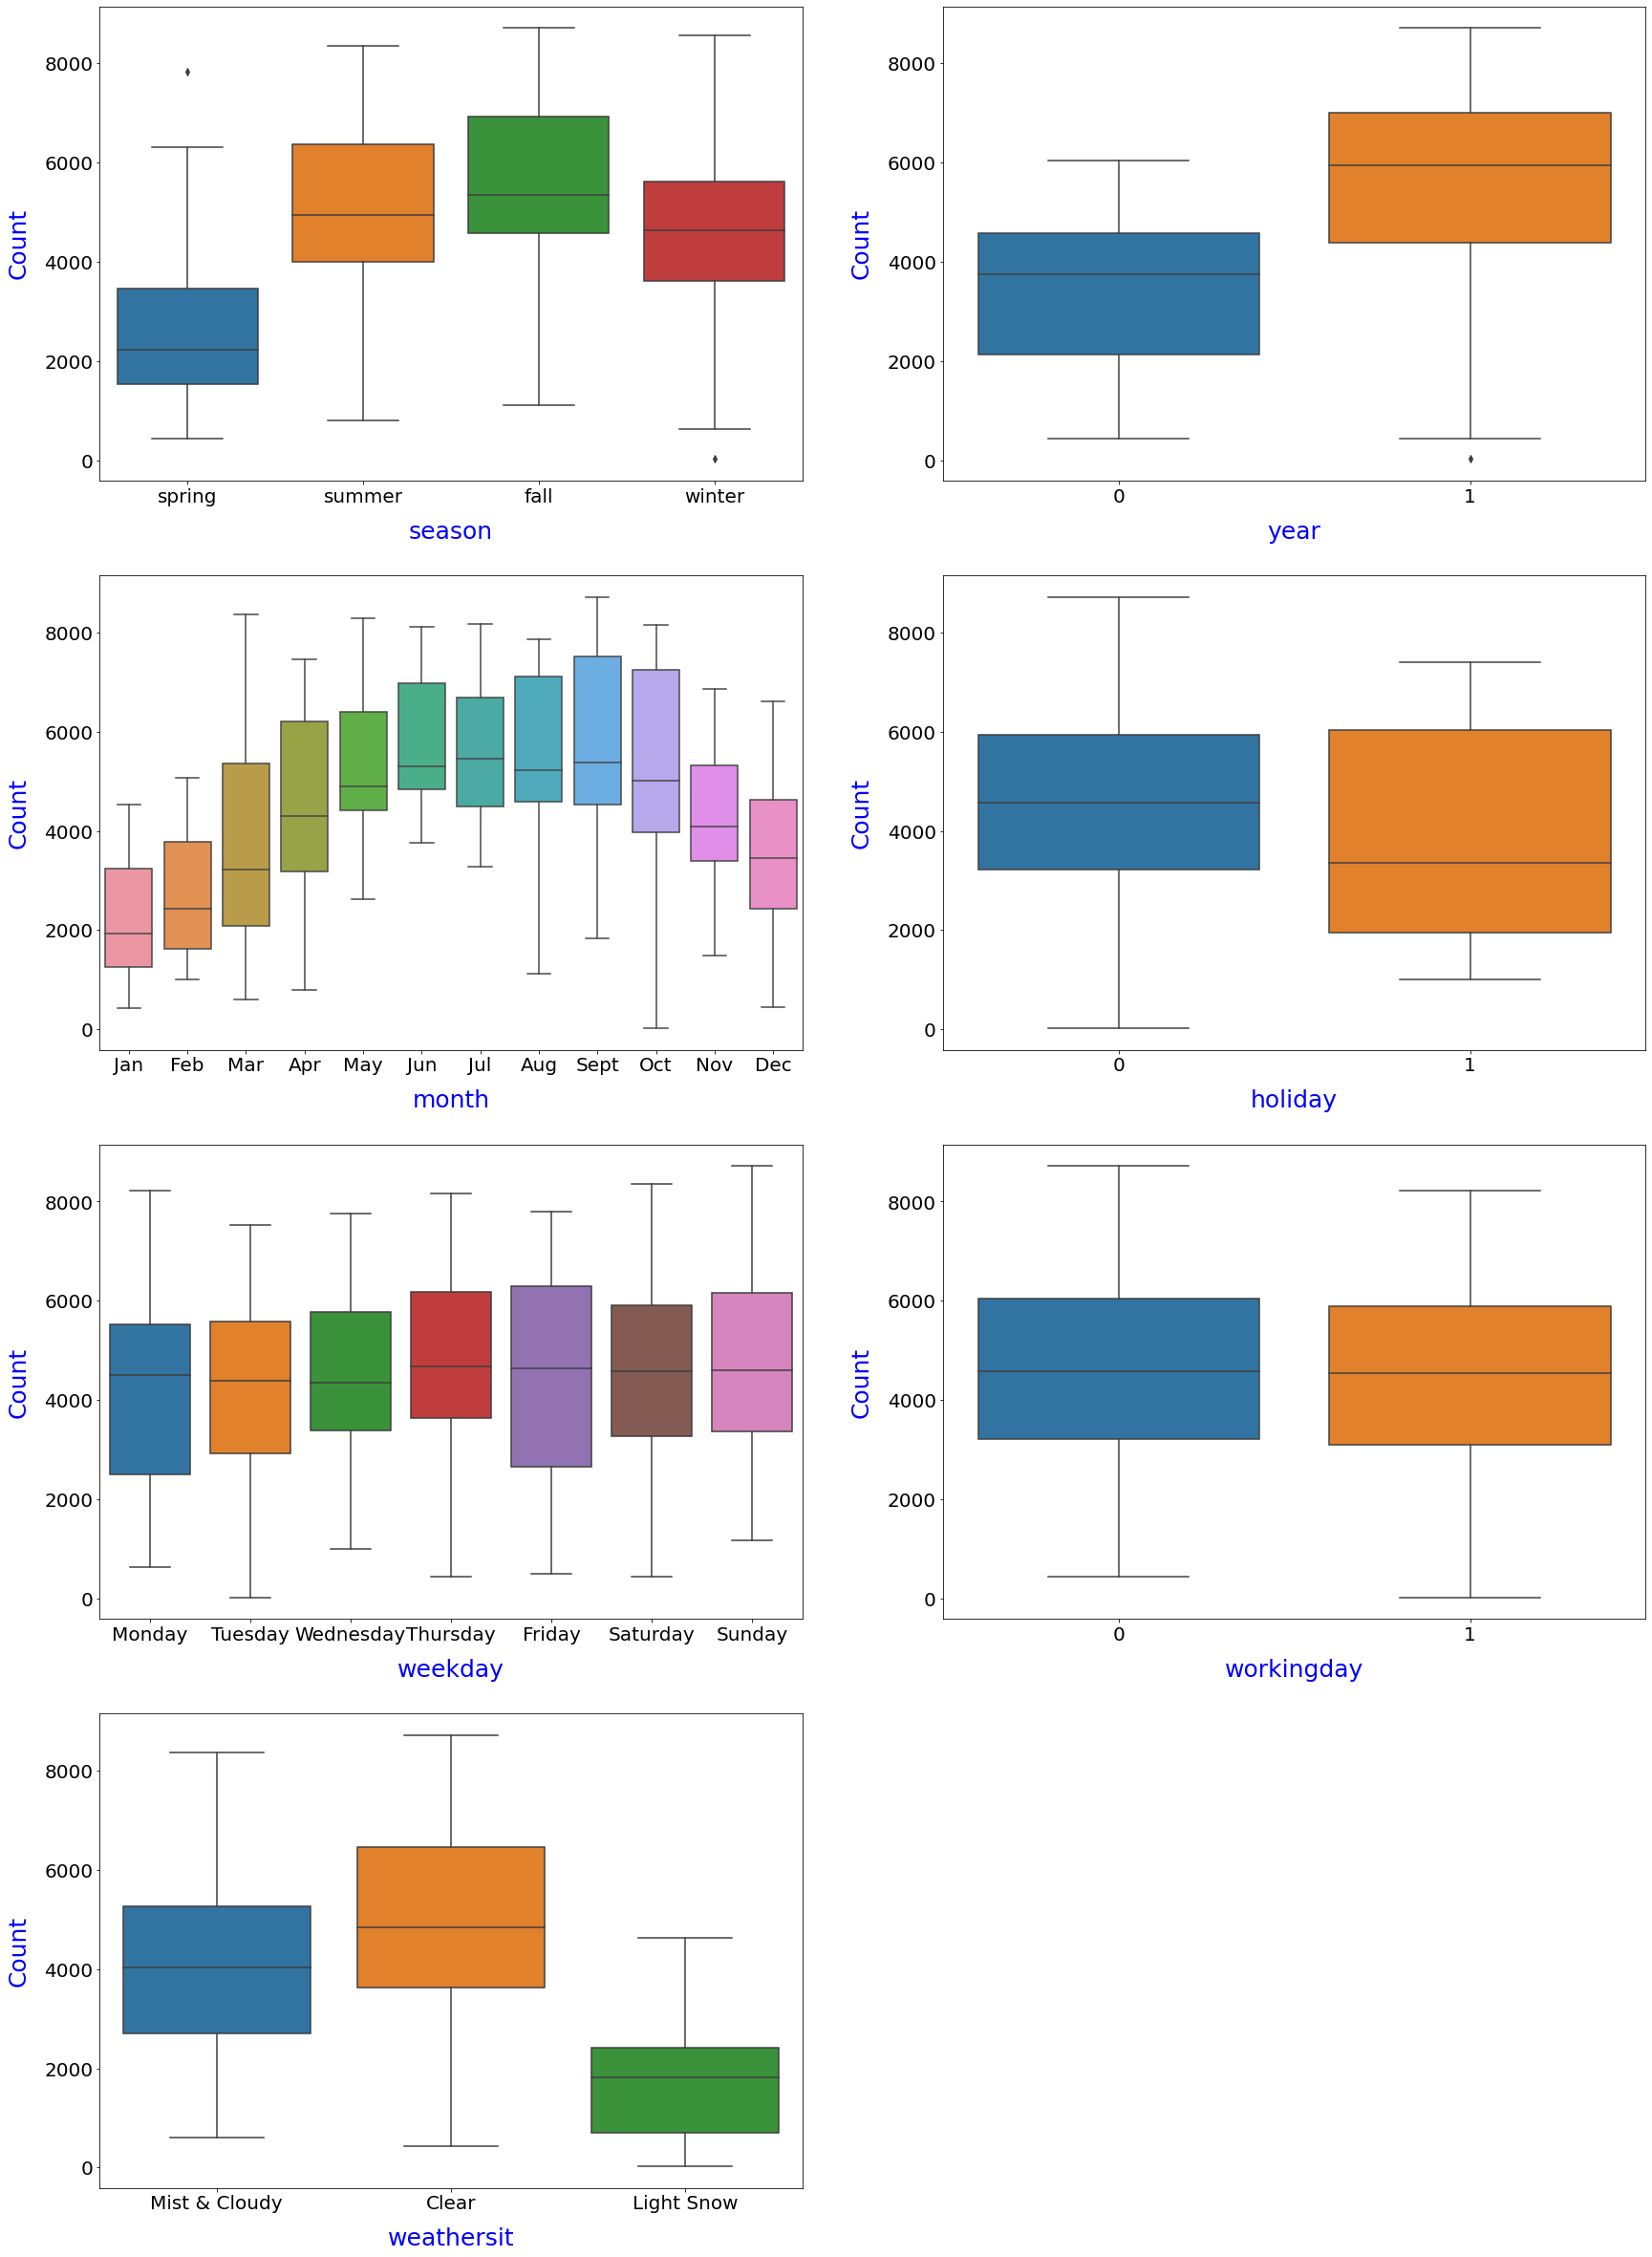

In [223]:
# Bivariate Analysis on 'season','year','month','holiday','weekday','workingday','weathersit' columns against target column 'cnt'

#Setting figure size plot
plt.figure(figsize = (29,42))

# Calling custom function for plotting box plot between categorical column 'season' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'season', 'cnt', 4, 2, 1)

# Calling custom function for plotting box plot between categorical column 'year' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'year', 'cnt', 4, 2, 2)

# Calling custom function for plotting box plot between categorical column 'month' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'month', 'cnt', 4, 2, 3)

# Calling custom function for plotting box plot between categorical column 'holiday' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'holiday', 'cnt', 4, 2, 4)

# Calling custom function for plotting box plot between categorical column 'weekday' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'weekday', 'cnt', 4, 2, 5)

# Calling custom function for plotting box plot between categorical column 'workingday' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'workingday', 'cnt', 4, 2, 6)

# Calling custom function for plotting box plot between categorical column 'weathersit' and numerical column 'cnt'
bivariate_category_numeric(BoomBike_df, 'weathersit', 'cnt', 4, 2, 7)

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

#### Inferense:

- **`season vs. count`:** 
  - From the above box plot between `season` and `count`, we can see that **count of bike                 rentals** is **very high** in season **`fall`**, having its 50% value is more than 5000 (approx.) and 95% is more than 8000. 
  
  - Whereas the season **`spring`** is having **very low bike rental count**, with 75% of box is below 4000.
  - We can also note that season **`spring`** and **`winter`** is having an **outlier** beyond the 95% (upper fench) and below the 5% (lower fench) box value respectively.


- **`year vs. count`:** 
  - From the above box plot between `year` and `count`, we can see that **count of bike rentals** is **very high** in the year **`2019`**, having its 95% value more than 8000 and 25% box value is more than 4000(approx.)
  - Where, the 50% box value for 2018 is less than 4000.
  - Also, year **2019** is having an **outlier**, below its lower fench.
  

- **`month vs. count`:** 
  - From the above box plot between `month` and `count`, we can see that **count of bike rentals** is **very high** for the month **September**, **October** and **August**.
  - Whereas, the bike rental count is `very low` for the month of **January**, **February** and **December**.
  
  
- **`holiday vs. count`:** 
  - From the above box plot between `holiday` and `count`, we can see that **count of bike rentals** is **very high** when there is **No holiday**, having its 25% value lies between 3000 to 4000 and 95% box value is beyond 8000.
  - Whereas, in holidays the 25% of box value lies below 2000.
  
  
- **`weekday vs. count`:** 
  - From the above box plot between `weekday` and `count`, we can see that **count of bike rentals** is **very high** in **Friday**, where as the rental count is low in **Monday** as its 25% value lies below 3000 (approx.).
  

- **`workingday vs. count`:** 
  - From the above box plot between `workingday` and `count`, we can see that **count of bike rentals** is **very high** for non working days, having 75% of box value around 6000 (approx.).
  
  
- **`weathersit vs. count`:** 
  - From the above box plot between `weathersit` and `count`, we can see that **count of bike rentals** is **very high** in **clear** weather, having its 75% of value lies above 6000.
  - Whereas, in **Light snow**, the **bike rentaql count** is very low, having its 75 % box value slightly more than 2000 (approx.).

#### Bivariate Analysis - Categorical vs. Numerical Variable with years

In [224]:
# Bivariate Analysis - Categorical - Numerical Variable

# Custom Function for Category vs. Numerical Bivariate Analysis using barplot

 # Function Input parameter: DataFrame, x_variable, y_variable, hue column
 # Function returns none

def bivariate_category_numeric_bar(df, x_var, y_var, hue_col):
    
    # Setting figure size
    plt.figure(figsize = (8,6))
    
    # Plotting barplot using seaborn
    sns.barplot(data = df, x = x_var, y = y_var, hue = hue_col)
    
    # Setting y_label and label display properties
    plt.ylabel('Count', color = 'b', labelpad = 15, fontsize = 16)
    
    # Setting x_label and label display properties
    plt.xlabel(x_var, color = 'b', labelpad = 10, fontsize = 16)
    
    # Setting xticks labels for 'year', 'holiday', 'workingday' variables
    if x_var == 'year':
        plt.xticks([0,1],['2018','2019'])
    if x_var == 'holiday':
        plt.xticks([0,1],['No Holiday','Holiday'])
    if x_var == 'workingday':
        plt.xticks([0,1],['weekend/holiday','workingday'])
    
    # Setting title and display fonts
    plt.title('Variation of Count with '+ x_var, pad = 25, color = 'b', fontsize = 20)
    
    # Displaying plot using matplotlib.pyplot show() function
    plt.show()

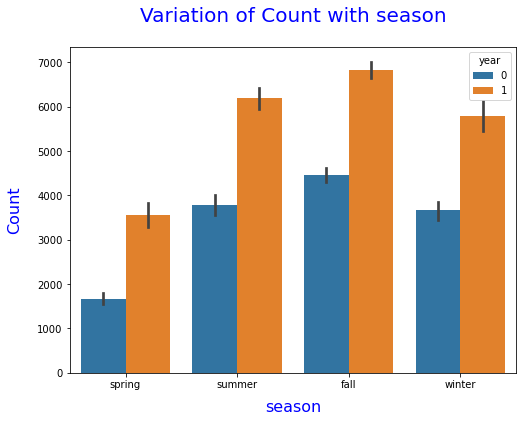

In [225]:
# Calling custom function for analysing variation of 'counts' against 'season' for different years
bivariate_category_numeric_bar(BoomBike_df, 'season', 'cnt', 'year')

#### Inferense:

- From above bar plot we can see that, for both the year of **2018** and **2019**, the bike rental count is **high** in season **fall**.
- Between the two years, **2019** is having more rental counts, i.e., `more than 6500 (approx.)`, comparing year **2018**, where the count is `more than 4000 (approx.)` in **fall**.
- Whereas, the bike rental count is **low** in **spring** for both 2018 and 2019.

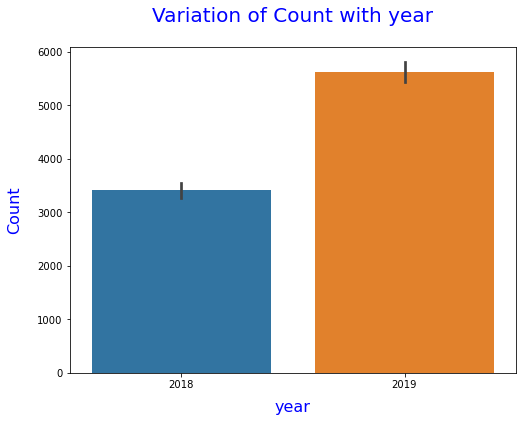

In [226]:
# Calling custom function for analysing variation of 'counts' against 'year'
bivariate_category_numeric_bar(BoomBike_df, 'year', 'cnt', None)

#### Inferense:
- From the above bar plot, it is clearly seen that year **2019 is having more bike rentals than 2018**.
- Where in **2018** the rental count is `around 3500 (approx.)`, in **2019** the rental count is `increases more than 5500 (approx.)`.  

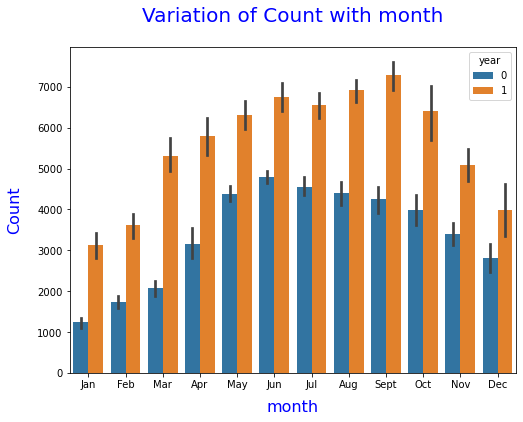

In [227]:
# Calling custom function for analysing variation of 'counts' against 'month' for different years
bivariate_category_numeric_bar(BoomBike_df, 'month', 'cnt', 'year')

#### Inferense:
- From the above bar plot, we can see that, for year **2019**, the rental count is **high** in the month of **September**.
- Whereas, for year **2018**, the rental count is **high** in the month of **June**.
- In contrast, the demand of bike rentals is **low** for the month of **January** for both year **2018** and **2019**.

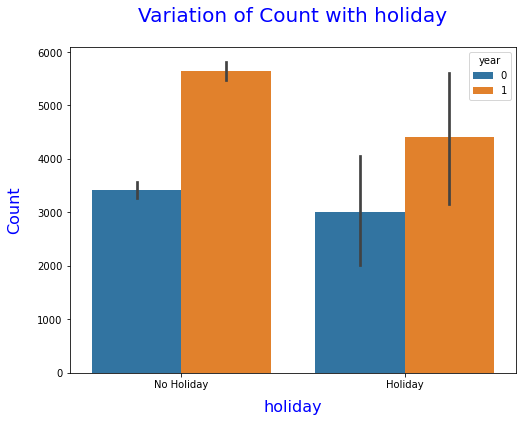

In [228]:
# Calling custom function for analysing variation of 'counts' against 'holiday' for different years
bivariate_category_numeric_bar(BoomBike_df, 'holiday', 'cnt', 'year')

#### Inferense:
- The above barplot depicts, that the bike rental count is **high** when there is **no holiday** in both the year **2018** and **2019**.

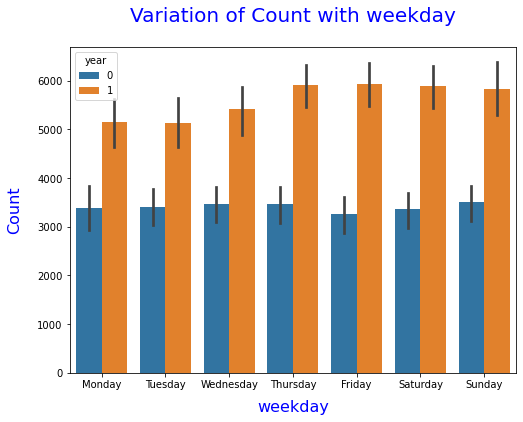

In [229]:
# Calling custom function for analysing variation of 'counts' against 'weekday' for different years
bivariate_category_numeric_bar(BoomBike_df, 'weekday', 'cnt', 'year')

#### Inferense:
- The above barplot says that, the demand of bike rental is **high** on **Thursday**, **Friday** and **Saturday** compared to other weekdays in the year of **2019**.
- Whereas, the bike rental demand is **high** on **Monday**, **Tuesday**, **Wednesday** and **Thursday** in the year of **2018**.

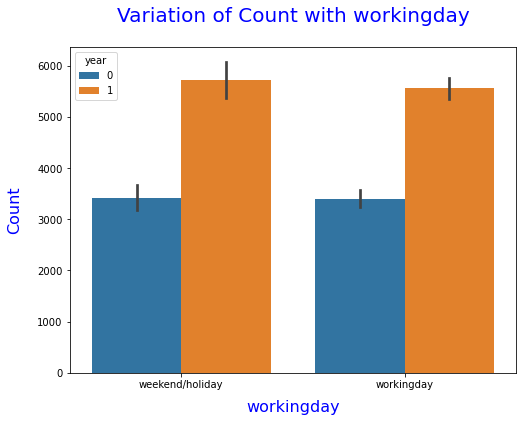

In [230]:
# Calling custom function for analysing variation of 'counts' against 'workingday' for different years
bivariate_category_numeric_bar(BoomBike_df, 'workingday', 'cnt', 'year')

#### Inferense:
- The above barplot shows, that the bike rental count is **high** when there is **weekwnd or holiday** compared to workingdays in both the year **2018** and **2019**.

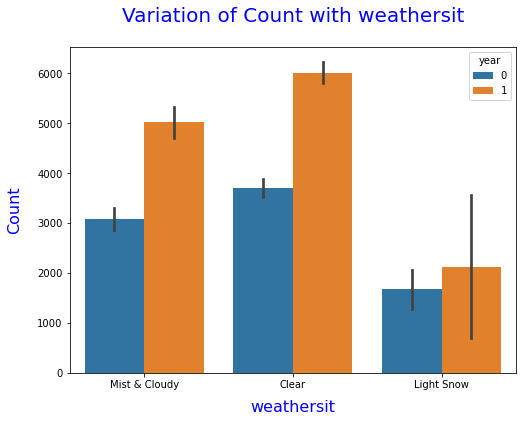

In [231]:
# Calling custom function for analysing variation of 'counts' against 'weathersit' for different years
bivariate_category_numeric_bar(BoomBike_df, 'weathersit', 'cnt', 'year')

#### Inferense:
- The above barplot depicts, that the demand of bike rental is **high** in **clear weather** in both the year **2018** and **2019**.
- Whereas, the demand reduces in **Light Snow** weather in both the year.

### Checking the co-relation between numerical variables

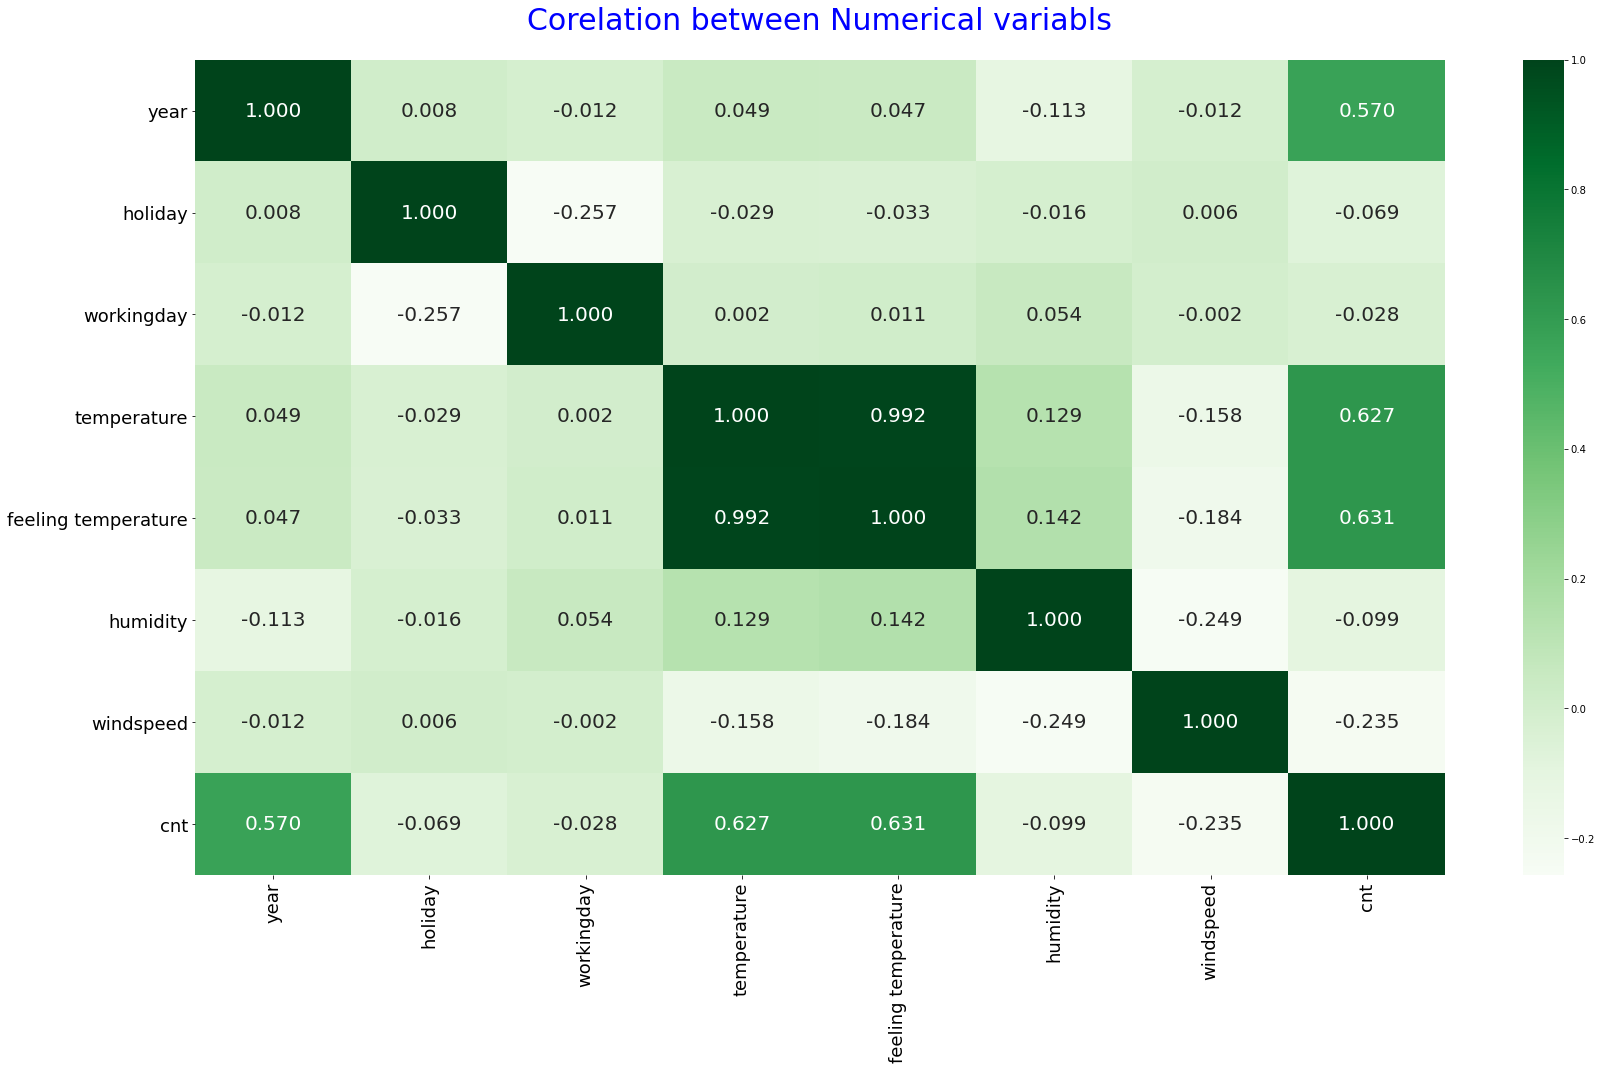

In [232]:
# Checking the co-relation between numerical variables

# Setting the figure size using matplotlib.pyplot
plt.figure(figsize = (28,15))

# Viewing correlation using seaborn heatmap()
sns.heatmap(BoomBike_df.corr(), annot = True, cmap = 'Greens', fmt = '.3f',annot_kws={"fontsize":20})

# Setting title using matplotlib.pyplot
plt.title('Corelation between Numerical variabls', pad = 30, color = 'b', fontsize = 30)

# Setting x-ticks font size
    
plt.xticks(fontsize = 18,rotation=90)
    
# Setting y-ticks font size
    
plt.yticks(fontsize = 18,rotation=0)

# Displaying the heatmap using matplotlib.pyplot
plt.show()

#### Inferense:

- The above Heatmap shows that, the **predictor variable `temperature` has a high positive (> 0.5) linear realtionship with the count of total rental bikes (Dependent variable 'cnt')**. The value of correlation coeficient between `temperature` and `bike rental count` is `0.627`.


- We can also see that the **predictor variable `feeling temperature` has a good (> 0.5) positive linear realtionship with the count of total rental bikes (Dependent variable 'cnt')**.The value of correlation coeficient between `feeling temperature` and `bike rental count` is `0.631`.


- Predictor Variable **Humidity**, **Windspeed do not show a good correlation (< 0.5) with bike rental counts `cnt`**, having correlation value of `-0.099` for Humidity,  `-0.235` for windspeed.

### Linearity Assumption:

- As it is visible from both the pairplot and heatmap, we can see **tempearature**, **feeling temperature** variables (predictor variables) has good positive linear correlation with the  **count** dependent variable (Count of rental bikes).


- **Both the plots (pair plot and heatmap) above helps to interpret the data well and identify the linear relationship with the predictor variables that can turn out to be useful in building the model**
- **So we can consider a Linear Regression Model.**

#### Dropping corelated Predictor based on correlation study:

-  From the above heatmap, we can see that predictor variable **temperature** and **felling temperature** is highly positively correlated with each-other, with correlation coefficient value of `0.992`.

- If we do not drop one of the predictor among them, it will effect regression coefficients and p-values of linear model by introducing multicollinearity into the linear regression model.

- Here we are **dropping `feeling temperature`** column and keeping **temperature** for model building.


In [233]:
# Dropping 'feeling temperature' column as it is having high correlation with 'temperature' column.
# If not dropped, it can affect the regression coeffiecients and p-values of independent variables during model building

BoomBike_df.drop('feeling temperature', axis = 1, inplace = True)

# Reviewing the DataFrame top 5 rows, after dropping 'feeling temperature' column
BoomBike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,1600


### Data Preparation

#### Create Dummy variables for all the categorical features
- Create n-1 dummy colums for `season` column
- Create n-1 dummy colums for `month` column
- Create n-1 dummy colums for `weekday` column
- Create n-1 dummy colums for `weathersit` column
- Merging the dummy columns with original DataFrame

#### Dropping categorical variables after creating dummies
- Drop `season`
- Drop `month`
- Drop `weekday`
- Drop `weathersit`

#### Divide the dataset into train and test dataset
- Use 70% of data to train dataset
- Use 30% of data as test dataset

#### Perform scalling on train dataset
- Normalize the values of numeric variables using MinMaxScalling

#### Divide the train dataset into dependent and independent variables
- Set `X_train` with all independent variables
- Set `y_train` with target/ dependent variable

#### Step 1: Create Dummy variable

In [234]:
# Data Preparation

# Create Dummy variables for all the categorical features

# Calling pandas get_dummies method to create dummy columns with (n-1) levels, considering n is number of unique levels 
# in each columns

dummies_season_df = pd.get_dummies(BoomBike_df['season'], drop_first = True)
dummies_month_df = pd.get_dummies(BoomBike_df['month'], drop_first = True)
dummies_weekday_df = pd.get_dummies(BoomBike_df['weekday'], drop_first = True)
dummies_weathersit_df = pd.get_dummies(BoomBike_df['weathersit'], drop_first = True)

# Concating all dummies DataFrame with original DataFrame
BoomBike_df = pd.concat([BoomBike_df, dummies_season_df, dummies_month_df, dummies_weekday_df, dummies_weathersit_df], axis = 1)

# Reviewing Final DataFrame after concating with dummy DataFrame
BoomBike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temperature,humidity,windspeed,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


#### Step 2: Dropping the original categorical columns for Dummy columns

In [235]:
# Dropping the original categorical columns for which dummy columns have been created

# Creating categorical variable list
cat_var_lst = ['season', 'month', 'weekday', 'weathersit']

# Dropping columns 
BoomBike_df.drop(cat_var_lst, axis = 1, inplace = True)

# Reviewing Final DataFrame after dropping features for which dummy columns were created
BoomBike_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
# Checking the shape of the Final DataFrame

BoomBike_df.shape

(730, 29)

#### Checking the correlations after creating Dummies

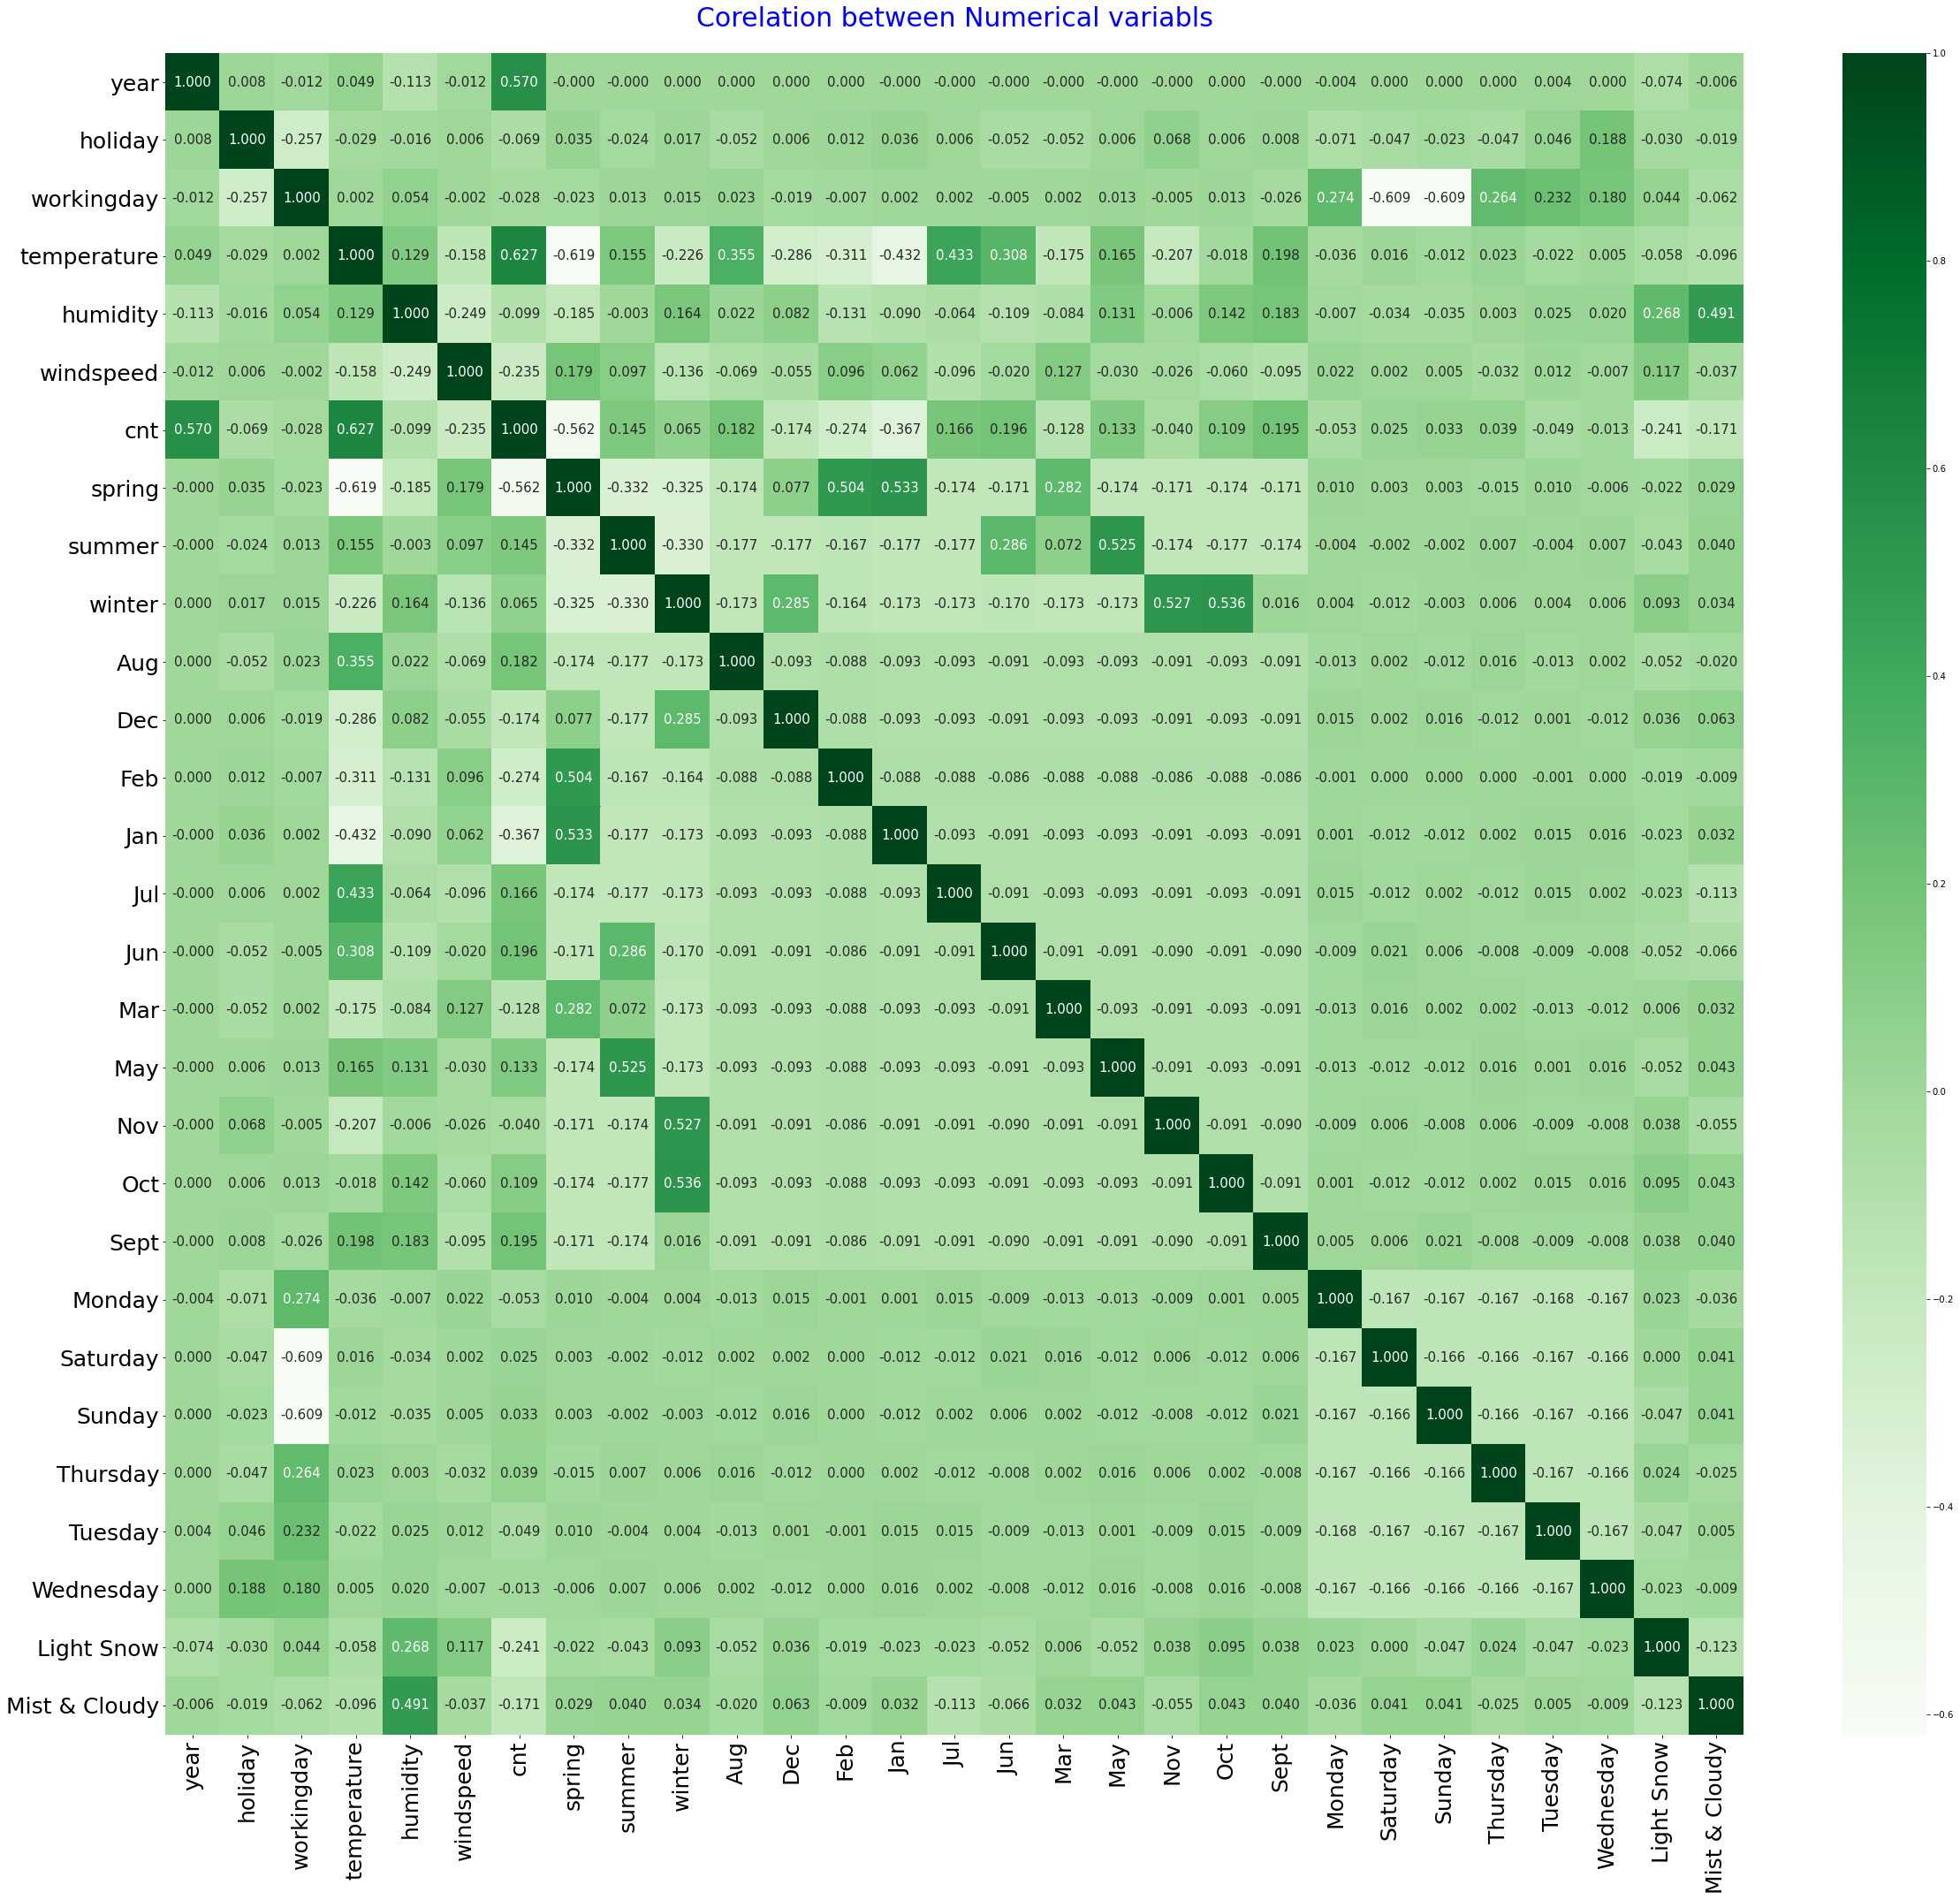

In [237]:
# checking the correlation between variables again

# Setting figuresize
plt.figure(figsize=(40, 35))

# Heatmap to see correlation between variables
sns.heatmap(BoomBike_df.corr(), cmap='Greens', annot = True, fmt = '.3f',annot_kws={"fontsize":15})

# Setting title using matplotlib.pyplot
plt.title('Corelation between Numerical variabls', pad = 30, color = 'b', fontsize = 30)

# Setting x-ticks font size
    
plt.xticks(fontsize = 25)
    
# Setting y-ticks font size
    
plt.yticks(fontsize = 25,rotation=0)

# Displaying plot using matplotlib.pyplot show() method
plt.show()

#### Inferense:
- From the above heatmap, we can see that the predictor variable **temperature has a high positive linear realtionship with the count of total rental bikes (Dependent variable 'cnt')**.It has a good correlation with the count that is `0.627`.

- We can see that **Summer season,June to october months are in good correlation with the 'count' variable**. And seem to have good influence on the number of bike rentals.

#### Step 3: Divide the train and test dataset

In [238]:
# Spliting the DataFrame between Train and Test DataSet
np.random.seed(0)
BoomBike_train_df, BoomBike_test_df = train_test_split(BoomBike_df, train_size = 0.7, random_state = 100)

In [239]:
BoomBike_train_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [240]:
# Checking the train DataFrame shape - No. of rows and columns in train DataFrame
BoomBike_train_df.shape

(510, 29)

In [241]:
# Checking the test DataFrame shape - No. of rows and columns in test DataFrame
BoomBike_test_df.shape

(220, 29)

#### Step 4: Perform Scalling on train Dataset continuous variables

- **Formula:** x_scalled = (x - min(x))/(max(x) - min(x))

- Perform MinMaxScaling to set the data values between 0 (Min) and 1 (Max) on below variables

    - `temperature`
    - `humidity`
    - `windspeed`
    - `cnt`

In [242]:
# Perform Scalling on train Dataset continuous variables

# Create a list of all continuous variables
var_list = ['temperature', 'humidity', 'windspeed']

# Calling MinMaxScaler function of sklearn
scaler = MinMaxScaler()

# Transforming the model values between 0 and 1
BoomBike_train_df[var_list] = scaler.fit_transform(BoomBike_train_df[var_list])

# Reviewing train DataFrame after scalling
BoomBike_train_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
576,1,0,1,0.815169,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,1683,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [243]:
#Checking numeric variables(min and max) after scaling
BoomBike_train_df.describe()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We can observe that the min and max values are set to `zero` and `one`

#### Step 5: Dividing into X and Y sets on train dataset for the model building

In [244]:
# Dividing into X and Y sets on train dataset for the model building

# Set y_train with target variable 'cnt'
y_train = BoomBike_train_df.pop('cnt')

# Set X_train with rest all independent variables
X_train = BoomBike_train_df

## Data Modelling and Evaluation


 
- **Create Linear Regression Model using mixed approach**

    - Recursive Feature Elimination (RFE) 
    - Manual Approach using p-value and Variance Inflation Factor (VIF)


- **Residual Analysis** :
    Check Various Assumptions of Linear Regression

    - **Normality**: Error terms are distributed normally with zero mean
    - **Homoscedasticity**: The variance of residual is the same for any value of X.
    - **Independence**: Observations are independent of each other.


- **Model Evaluation:** Prediction on test dataset based on trainded model


- **Check R-Squared, Adjusted R-Squared, MSE, RMSE on both train and test dataset**


- **Visualizing Best fit line on test dataset**

### Building a linear model

#### Using Recursive Feature Elimination (RFE)

In [245]:
# Building a linear model
# Running RFE for importent Feature selection 

lm_model = LinearRegression()

# Select the output number of the variable equal to 15 in RFE

rfe = RFE(lm_model, 15)

# Model building using RFE
rfe = rfe.fit(X_train, y_train)

In [246]:
# Reviewing list of features selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light Snow', True, 1),
 ('Mist & Cloudy', True, 1)]

In [247]:
# Reviewing featurs where rfe selection is True
feature_cols = X_train.columns[rfe.support_]
print(feature_cols)

Index(['year', 'holiday', 'temperature', 'humidity', 'windspeed', 'spring',
       'summer', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept', 'Light Snow',
       'Mist & Cloudy'],
      dtype='object')


In [248]:
# # Reviewing featurs where rfe selection is False
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [249]:
# Building models using statsmodels library for detailed statistics analysis

# X_train dataset selected by RFE

X_train_rfe = X_train[feature_cols]

In [250]:
# Custom Function for Linear Regression model building and displaying summary of the model

    # Function Input Parameter: X_train dataset
    # Function Output Parameter: Returns Linear Regression Model object

def sm_model_build(X_train_dataset):
    
    # Adding constant on X_train variables
    X_train_rfe_sm = sm.add_constant(X_train_dataset)
    
    # Building models using statsmodels Ordinary least squared method
    lm_smodel = sm.OLS(y_train, X_train_rfe_sm).fit()
    
    # returning statistical summary model
    return lm_smodel

In [251]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          8.15e-189
Time:                        18:16:02   Log-Likelihood:                -4111.6
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     494   BIC:                             8323.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2800.5481    313.638      8.929

### Perform Manual Approach to drop multicollinear and insignifient Predictor variables

#### Multicollinear Predictor variables will be dropped based on VIF values
   - **Variance Inflation Factor, VIF = 1/ (1-R2)** 
       - VIF > 10, should be dropped
       - VIF between 5 to 10, should be evaluated
       - VIF < 5, is safe to consider
       
#### Insignificant Predictor variables will be dropped based on p- values
   - p-value > 0.05, should be dropped
   - p-value < 0.05, is safe to consider

In [252]:
# Calculating variance inflation factor to check multicolinearity among X_train_rfe_sm variables

# Custom function for VIF calculation

    # Function Input Parameter: X_train dataset
    # Function Output Parameter: Returns VIF DataFrame

def Calculate_VIF(X_train_dataset):
    
    # Create blank DataFrame for VIF
    VIF_df = pd.DataFrame()
    
    # Add 'Features' column in VIF DataFrame
    VIF_df['Features'] = X_train_dataset.columns
    
    # Add 'VIF' column in VIF DataFrame
    VIF_df['VIF'] = [variance_inflation_factor(X_train_dataset.values, i) for i in range(X_train_dataset.shape[1])]
    
    # Rounding VIF value upto 2 Decimal places
    VIF_df = round(VIF_df, 2)
    
    # Sorting the VIF DataFrame by 'VIF' column
    VIF_df.sort_values(by = 'VIF', ascending = False, inplace = True)
    
    # Returning 'VIF' DataFrame
    return VIF_df

In [253]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
3,humidity,30.89
2,temperature,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist & Cloudy,2.32
0,year,2.09
11,Nov,1.85
9,Jan,1.75


#### Inferense:
- From the above `Linear Regression Model summary`, we can see that the **p-value is high** for the predictor variable **Dec**. Hence, we are dropping `Dec` variable. Otherwise, it makes the coefficient insignificant.

#### Dropping `Dec` column due to high p-value and building the model again

In [254]:
# Dropping 'Dec' column as it is having high p-value, that makes the coefficient insignificant
X_train_rfe.drop(['Dec'], axis = 1, inplace = True)

In [255]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          4.41e-189
Time:                        18:16:02   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2657.8086    306.565      8.670

In [256]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
3,humidity,29.09
2,temperature,16.80
4,windspeed,4.72
5,spring,4.37
7,winter,3.78
6,summer,2.80
13,Mist & Cloudy,2.29
0,year,2.09
8,Jan,1.67
10,Nov,1.60


#### Inferense:
- From the above `Linear Regression Model summary`, we can see that the **p-value is high** for the predictor variable **Nov**. Hence, we are dropping `Nov` variable. Otherwise, it makes the coefficient insignificant.

#### Dropping `Nov` column due to high p-value and building the model again

In [257]:
# Dropping 'Nov' column as it is having high p-value, that makes the coefficient insignificant
X_train_rfe.drop(['Nov'], axis = 1, inplace = True)

In [258]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          7.59e-190
Time:                        18:16:02   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8317.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2598.4103    303.711      8.556

In [259]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
3,humidity,29.02
2,temperature,16.71
4,windspeed,4.66
5,spring,4.34
7,winter,3.36
6,summer,2.79
12,Mist & Cloudy,2.29
0,year,2.09
8,Jan,1.67
9,Jul,1.59


#### Inferense:
- From the above `Linear Regression Model summary`, we can see that the **p-value is high** for the predictor variable **Jan**. Hence, we are dropping `Jan` variable. Otherwise, it makes the coefficient insignificant.

#### Dropping `Jan` column due to high p-value and building the model again

In [260]:
# Dropping 'Jan' column as it is having high p-value, that makes the coefficient insignificant
X_train_rfe.drop(['Jan'], axis = 1, inplace = True)

In [261]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.95e-190
Time:                        18:16:02   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2497.0845    299.726      8.331

In [262]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
3,humidity,28.03
2,temperature,16.03
4,windspeed,4.65
5,spring,4.01
7,winter,3.33
6,summer,2.79
11,Mist & Cloudy,2.28
0,year,2.08
8,Jul,1.58
9,Sept,1.38


#### Inferense:
- From the above `Variance Inflation Factor` DataFrame, we can see that the **VIF is high (> 10)** for the predictor variable **humidity**, which indicates its multicollineariry with other Predictor variables. Hence, we are dropping `humidity` variable.

#### Dropping `humidity` column due to high VIF and building the model again

In [263]:
# Dropping 'humidity' column as it is having high VIF, that indicates its multicollineariry with other Predictors
X_train_rfe.drop(['humidity'], axis = 1, inplace = True)

In [264]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          5.06e-187
Time:                        18:16:02   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     498   BIC:                             8329.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1755.4766    256.961      6.832

In [265]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
2,temperature,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,Jul,1.58
10,Mist & Cloudy,1.55
8,Sept,1.34
9,Light Snow,1.08


#### Inferense:
- From the above `Linear Regression Model summary`, we can see that the **p-value is high** for the predictor variable **Jul**. Hence, we are dropping `Jul` variable. Otherwise, it makes the coefficient insignificant.

#### Dropping `Jul` column due to high p-value and building the model again

In [266]:
# Dropping 'Jul' column as it is having high p-value, thay makes the coefficient insignificant
X_train_rfe.drop(['Jul'], axis = 1, inplace = True)

In [267]:
# Calling model build function
lrmodel = sm_model_build(X_train_rfe)
print(lrmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.47e-186
Time:                        18:16:02   Log-Likelihood:                -4130.9
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     499   BIC:                             8330.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1680.9085    257.298      6.533

In [268]:
# Calling VIF calculation function
VIF_dataframe = Calculate_VIF(X_train_rfe)

# Reviewing VIF DataFrame
VIF_dataframe

,Features,VIF
3,windspeed,4.60
2,temperature,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Mist & Cloudy,1.55
7,Sept,1.23
8,Light Snow,1.08
1,holiday,1.04


#### Inferense:
- From the above `Linear Regression Model summary`, we can see that the **p-value** for all the predictor variables are within the acceptable range, which stats that **all the Predictor variables are `Significant`**. 


- The above `Variance Inflation Factor` DataFrame also shows that, **VIF value** of all the features are **less than 5**, i.e. within safe limit to consider. Which stats that **predictor variables are not having `multicollinearity` among each-other**.


- Also, the `Linear Regression Model summary` is showing the value of **R-squared** as **83.3 %** and the value of **Adjusted R-squared** as **82.9 %**, which mean the **model is able to explain 83.3 % of its variance**.


- The `Linear Regression Model summary` shows the **F-statistic** is **248.4**, which makes the **probability of F-statistic very low (~0)**, which indicates a very good model fit.


- **From all the above observations, we have consider this model as our Final Model**.

## Residual Analysis on the train data

In [269]:
# Calculate y_train_pred from final model

# Add B0 coefficient with X_train_rfe dataset
X_train_rfe_stml = sm.add_constant(X_train_rfe)
print(X_train_rfe_stml.head(1))
# calculate y_train_pred

y_train_pred = lrmodel.predict(X_train_rfe_stml)

     const  year  holiday  temperature  windspeed  spring  summer  winter  \
576    1.0     1        0     0.815169   0.264686       0       0       0   

     Sept  Light Snow  Mist & Cloudy  
576     0           0              0  


In [270]:
# Reviewing top 5 rows of y_train_pred dataset
y_train_pred.head()

576    6760.237298
426    4058.314918
728    3398.575571
482    4971.514233
111    2481.665189
dtype: float64

In [271]:
# Calculating residuals/ error terms

res = y_train - y_train_pred

# viewing the top 5 rows of error terms/ residuals
print(res.head())

576     455.762702
426       7.685082
728   -1602.575571
482    -751.514233
111    -798.665189
dtype: float64


# Saving Model in pkl file

In [272]:
joblib.dump(lrmodel,'D:\Data Science\Python Projects\PyCharm\ML Model Deployment\BOOM Bike Sharing Regression Model\models\Boom_Bike_lrmodel.pkl')

['D:\\Data Science\\Python Projects\\PyCharm\\ML Model Deployment\\BOOM Bike Sharing Regression Model\\models\\Boom_Bike_lrmodel.pkl']

# Saving Scalling object in pkl file

In [273]:
joblib.dump(scaler,'D:\Data Science\Python Projects\PyCharm\ML Model Deployment\BOOM Bike Sharing Regression Model\models\Boom_Bike_scaler.pkl')

['D:\\Data Science\\Python Projects\\PyCharm\\ML Model Deployment\\BOOM Bike Sharing Regression Model\\models\\Boom_Bike_scaler.pkl']

### Checking Assumptions

#### Normality:

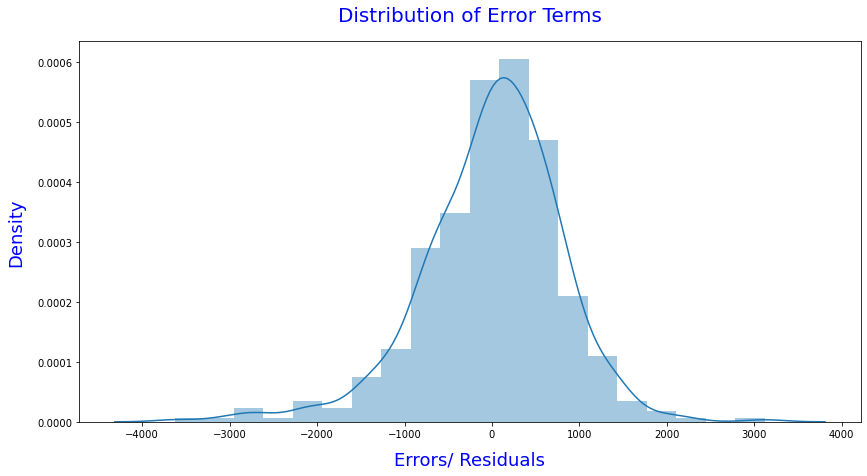

In [274]:
# Plot the distribution of the error terms to check 'Normality' assumption

plt.figure(figsize=(14,7))
sns.distplot(res, bins = 20)

# Setting heading for the residual distribution plot
plt.title('Distribution of Error Terms', fontsize = 20, color = 'b', pad = 20)      

# Setting X-label
plt.xlabel('Errors/ Residuals', fontsize = 18, color = 'b', labelpad = 12)

# Setting y-label
plt.ylabel('Density', fontsize = 18, color = 'b', labelpad = 12) 

# Displaying the plot using matplotlib.pyplot show() method
plt.show()

#### Inferense:

- The above distribution plot shows that the **Residuals/ Error terms** are **normally distributed with zero mean**.
- Hence, our assumption of **Normality becoms true** for this model.

#### Homoscedasticity:

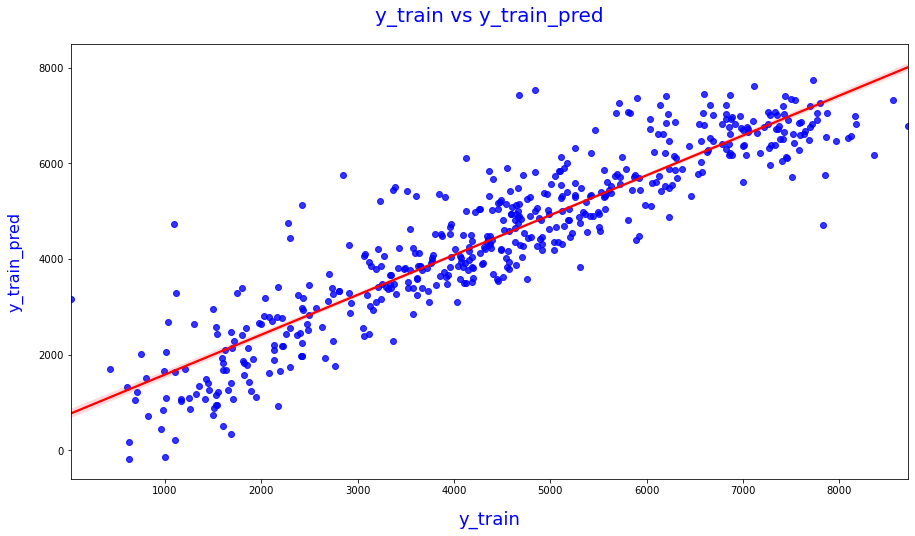

In [275]:
#Regression plot

# Setting Figure size
plt.figure(figsize=(15,8))

# Plotting regplot() to understand the fit of the y_test_pred o y_test dataset
sns.regplot(x=y_train, y=y_train_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting title and display properties
plt.title('y_train vs y_train_pred', fontsize=20, color = 'b', pad = 22)  

# Setting xlabel and display properties
plt.xlabel('y_train', fontsize=18, color = 'b', labelpad = 15)    

# Setting ylabel and display properties
plt.ylabel('y_train_pred', fontsize=16, color = 'b', labelpad = 15)                         

# Displaying the plot using matplotlib.pyplot show() method
plt.show()

#### Inferense:

- The above regression plot between **y_train** and **y_train_pred** are **equally distributed along the regression line**. That is, the variance is constant.
- Hence, the **assumption of equal variance/ Homoscedasticity becoms true** for our model.

#### Independence:

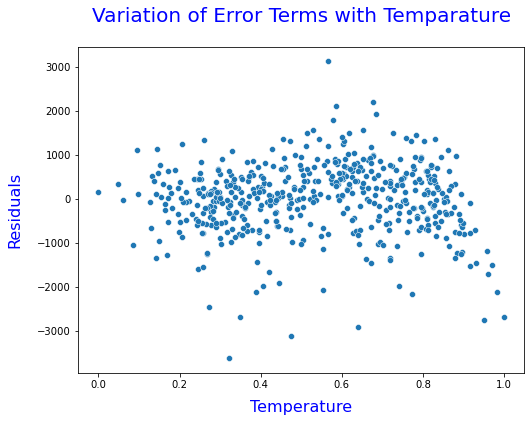

In [276]:
# Setting figure size
plt.figure(figsize = (8,6))

# Plotting scatterplot using seaborn
sns.scatterplot(X_train_rfe['temperature'], res)

# Setting y_label and label display properties
plt.ylabel('Residuals', color = 'b', labelpad = 15, fontsize = 16)

# Setting x_label and label display properties
plt.xlabel('Temperature', color = 'b', labelpad = 10, fontsize = 16)

# Setting title and display fonts
plt.title('Variation of Error Terms with Temparature', pad = 25, color = 'b', fontsize = 20)

# Displaying plot using matplotlib.pyplot show() function
plt.show()

#### Inferense:

- The above scater plot between the **predictor variable: temperature** and **Residuals** shows that **the Residuals are independent of each-other**. There is `no pattern exists` among residuals/ error terms.
- Hence, the **assumption of independence becoms true** for our model.

### Model Evaluation

- Predicting test dataset from trained model
    - Perform scalling
    - Divide X and y sets on test dataset
    - Drop X set columns which are not part of final model
    - Calculating Y_test_predict from trained model

#### Predict test dataset based on trained model

##### Step 1: Perform scalling on test dataset

In [277]:
# Perform Scalling on test Dataset continuous variables

# Create variable list to be scalled
var_list = ['temperature', 'humidity', 'windspeed']

# Transform the test dataset based on train fit
BoomBike_test_df[var_list] = scaler.transform(BoomBike_test_df[var_list])

# Reviewing train DataFrame after scalling
BoomBike_test_df.head()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
184,0,1,0,0.831783,0.657364,0.084219,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [278]:
# Describing the test DataFrame to check whether all data points are within 0 and 1
BoomBike_test_df.describe()

,year,holiday,workingday,temperature,humidity,windspeed,cnt,spring,summer,winter,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,4560.559091,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,1904.968544,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,3312.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,4582.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,5913.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Step 2: Dividing test dataset into X and Y sets

In [279]:
# Dividing into X and Y sets on test dataset for the model building

y_test = BoomBike_test_df.pop('cnt')
X_test = BoomBike_test_df

In [280]:
# Displaying top 5 rows of y_test dataset
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [281]:
# Displaying top 5 rows of X_test dataset
X_test.head()

,year,holiday,workingday,temperature,humidity,windspeed,spring,summer,winter,Aug,...,Oct,Sept,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Mist & Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


##### Step 3: Creating final X sets after eliminating predictors which are absent in final model

In [282]:
# Making predictions on test dataset based on our model

# Creating X_test_sm dataframe by dropping variables from X_test
X_test_sm = X_test[X_train_rfe.columns]

# Displaying X_test_sm dataset top 5 rows
X_test_sm.head()

,year,holiday,temperature,windspeed,spring,summer,winter,Sept,Light Snow,Mist & Cloudy
184,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


##### Step 4: Calculating Y_test_predictor from trained model

In [283]:
# Adding a constant variable 
X_test_smodel = sm.add_constant(X_test_sm)

# Displaying X_test dataset top 5 rows after adding constant
X_test_smodel.head()

,const,year,holiday,temperature,windspeed,spring,summer,winter,Sept,Light Snow,Mist & Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [284]:
# Creating predictions on test dataset
y_test_pred = lrmodel.predict(X_test_smodel)

# Displaying y_test_pred dataset top 5 rows
y_test_pred.head()

184    3504.872086
535    7800.519196
299    3513.392980
221    4904.728463
152    4922.279900
dtype: float64

### Calculating Model parameters on test dataset

- R-squared 
- Adjusted R-Squared
- Mean squared error (MSE)
- Root Mean squared error (RMSE)

#### R-squared Calculation:

In [285]:
# Finding R-squared for Test set

r2_score = r2_score(y_true = y_test, y_pred = y_test_pred)

print(r2_score)

0.8038195990728842


#### Inferense:

- The calculated **R-squared** value of test dataset is **0.8038** or **80.38%**, which means the model is able to explain 80.38% variance in it.
- This a very **good r2_score** value.

#### Adjusted R-squared Calculation:

In [286]:
# Finding Adjusted R-Squared for Test set

n = X_test_sm.shape[0]
k = X_test_sm.shape[1]

Adjusted_R2 = 1-(((1-r2_score)*(n-1))/(n-k-1))

print(Adjusted_R2)

0.7944329770189553


#### Inferense:

- The calculated **Adjusted R-squared** value of test dataset is **0.7944** or **79.44%**.

#### Mean squared error Calculation:

In [287]:
# Finding MSE (mean squared error) for Test set

mean_squared_error_val = mean_squared_error(y_true = y_test, y_pred = y_test_pred)

print(mean_squared_error_val)

708684.0672882557


#### Inferense:

- The calculated **MSE (mean squared error)** value of test dataset is **0.00938**.
- As we know, that the low the value of MSE the better the model is, so our predicted model is a good model.

#### Root mean squared error Calculation:

In [288]:
# Clculating the RMSE (root mean squared error) on the test dataset
print(np.sqrt(mean_squared_error_val))

841.8337527613487


#### Inferense:

- The calculated **RMSE (Root mean squared error)** value of test dataset is **0.09685**.
- As we know, that the low the value of RMSE the better the model is, so our predicted model is a good model.

### Train and Test Model comparison

- **R-Squared Value:**
  - The value of `R-Squared in train model` is **83.3%**
  - The calculated value of `R-Squared in test predicted model` is **80.38%**
  - **Difference in R-Squared** between **train** and **test** is **2.92%**, which is within 5 % range.

  
  
- **Adjusted R-Squared Value:**
  - The value of `Adjusted R-Squared in train model` is **82.9%**
  - The calculated value of `Adjusted R-Squared in test predicted model` is **79.44%**
  - **Difference in Adjusted R-Squared** between **train** and **test** is **3.26 %**, which is within 5 % range.
  
  
- As we consider that, if **R-Squared and Adjusted R-Squared value of test model lies with in ±5% of R-Squared and Adjusted R-Squared of train model respectively**, then the model is a good model. As in our case this condition is satisfied, we can say our model is a good model and able to generalize unknown dataset very well.

### Visualising the fit on the test set

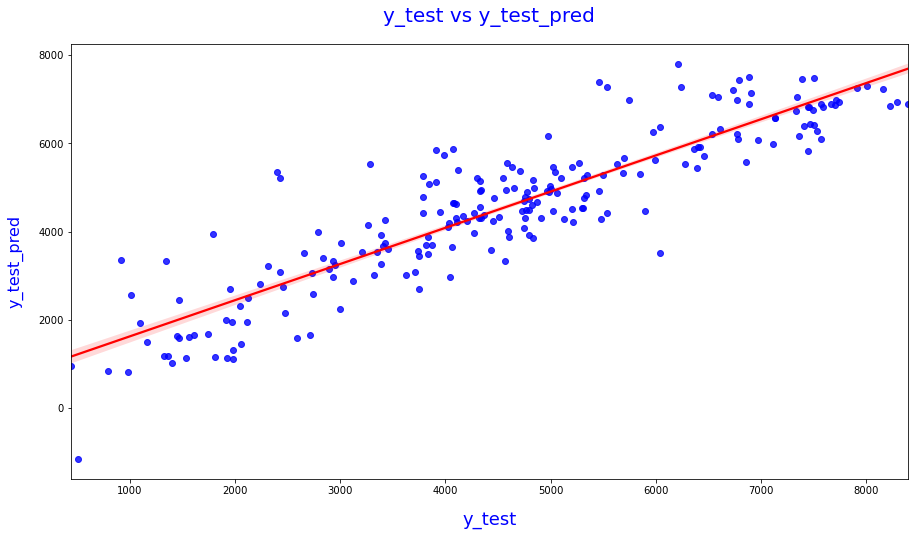

In [289]:
# Visualising the fit on the test set

#Regression plot

# Setting figure size
plt.figure(figsize=(15,8))

# Plotting regplot() to understand the fit of the y_test_pred o y_test dataset
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting title and display properties
plt.title('y_test vs y_test_pred', fontsize=20, color = 'b', pad = 22)  

# Setting xlabel and display properties
plt.xlabel('y_test', fontsize=18, color = 'b', labelpad = 15)    

# Setting ylabel and display properties
plt.ylabel('y_test_pred', fontsize=16, color = 'b', labelpad = 15)                         

# Displaying the plot using matplotlib.pyplot show() method
plt.show()

#### Inferense:

- The above regression plot between **y_test** and **y_test_pred** shows that the predicted values are equally distributed along the regression line/ best fit line.

- Which means, our predicted model will able to **generalize** the output based on unknown dataset.

## Best Fit Regression Line Equation based on Final model:

$cnt=1680.9085 + 4152.4862×temperature+790.9513×Sept+539.5655×summer+821.1889×winter+2035.0738×year-2477.4933×Light  Snow-684.4142×MistCloudy-481.5900×spring-837.1794×holiday-1287.2679×windspeed$

### Model Interpretation:

- We can see from the above model equation, the dependent variable, i.e., the count of bike rental (cnt) is increases with the increase of temperature. **1 unit increase of temperature will increase the bike rental demand by 0.4777 units** keeping all other feature constant.


- The model says that, the dependent variable, i.e., the count of bike rental (cnt) is dependent on september month. **In September month the Bike Rental demand increases by 0.0910 units** keeping all other feature constant.


- The model also says that, the dependent variable, i.e., the count of bike rental (cnt) is dependent on summer season. **In summer season the Bike Rental demand increases by 0.0621 units** keeping all other feature constant.


- The model says that, the dependent variable, i.e., the count of bike rental (cnt) is dependent on winter season. **In Winter season the Bike Rental demand increases by 0.0945 units** keeping all other feature constant.


- We can also see some negative dependencies on predictor variables from the above model equation. The dependent variable, i.e., **the count of bike rental (cnt) is decreses in Light Snow weather situation. In Light Snow weather, bike rental demand decreases by 0.2850 units** keeping all other feature constant.


- The dependent variable, i.e., the count of bike rental (cnt) is also decreses in Mist and cloudy weather situation. **In Mist and cloudy weather, bike rental demand decreases by 0.0787 units** keeping all other feature constant.


- The dependent variable, i.e., the count of bike rental (cnt) is also dependent on spring season. We can observe that **Bike rental decreses in Spring season. In Spring season, bike rental demand decreases by 0.0554 units** keeping all other feature constant.


- The dependent variable, i.e., the count of bike rental (cnt) is also dependent on hodiday. We can observe that Bike rental decreses in holidays. **In holidays, bike rental demand decreases by 0.0963 units** keeping all other feature constant.


- The dependent variable, i.e., the count of bike rental (cnt) is dependent on wind speed. We can observe that Bike rental decreses if wind speed is high. **When wind speed increases by one unit, bike rental demand decreases by 0.1481 units** keeping all other feature constant.

## Business Explanation:

Business can focus on the below **factors** to understand the features on which the demand for these shared bikes depends in the American market. 



-  A US bike-sharing provider BoomBikes can focus more on temperature, as **increase in temperature will increase the demand of bikes**.




- Business should focus more  on **Summer and  Winter season** as the demand is high during these two season.




- Demand is also high in the month of **September**, so business can focus on this month.





-  We can see demand for bikes was more in 2019 than 2018, **As there is increase in demand in 2019** , but business might be facing dips in their revenues due to the ongoing Corona pandemic and by the time Corona Virus reduces the things will be better.



- We can see **Spring season has negative coefficients and negatively correlated to bike rentals**. So  Business can give some `offers/ Discounts` to increase the demand.




-  Similarly we can see that there is **less demand in Mist & cloudy and Light snow weather condition**, Business can give some `offers/Discounts` or `arrange bike shield` to increase the demand during this weather situation.



- Now seeing to **holiday variable, we have got negative coefficients for holidays**, Business can give some `special Packages` to increase the demand.